# Movie Review Sentiment Analysis #

An end-to-end project on the movie Elemental using wordclouds, visualizations, and a machine learning model on text data.

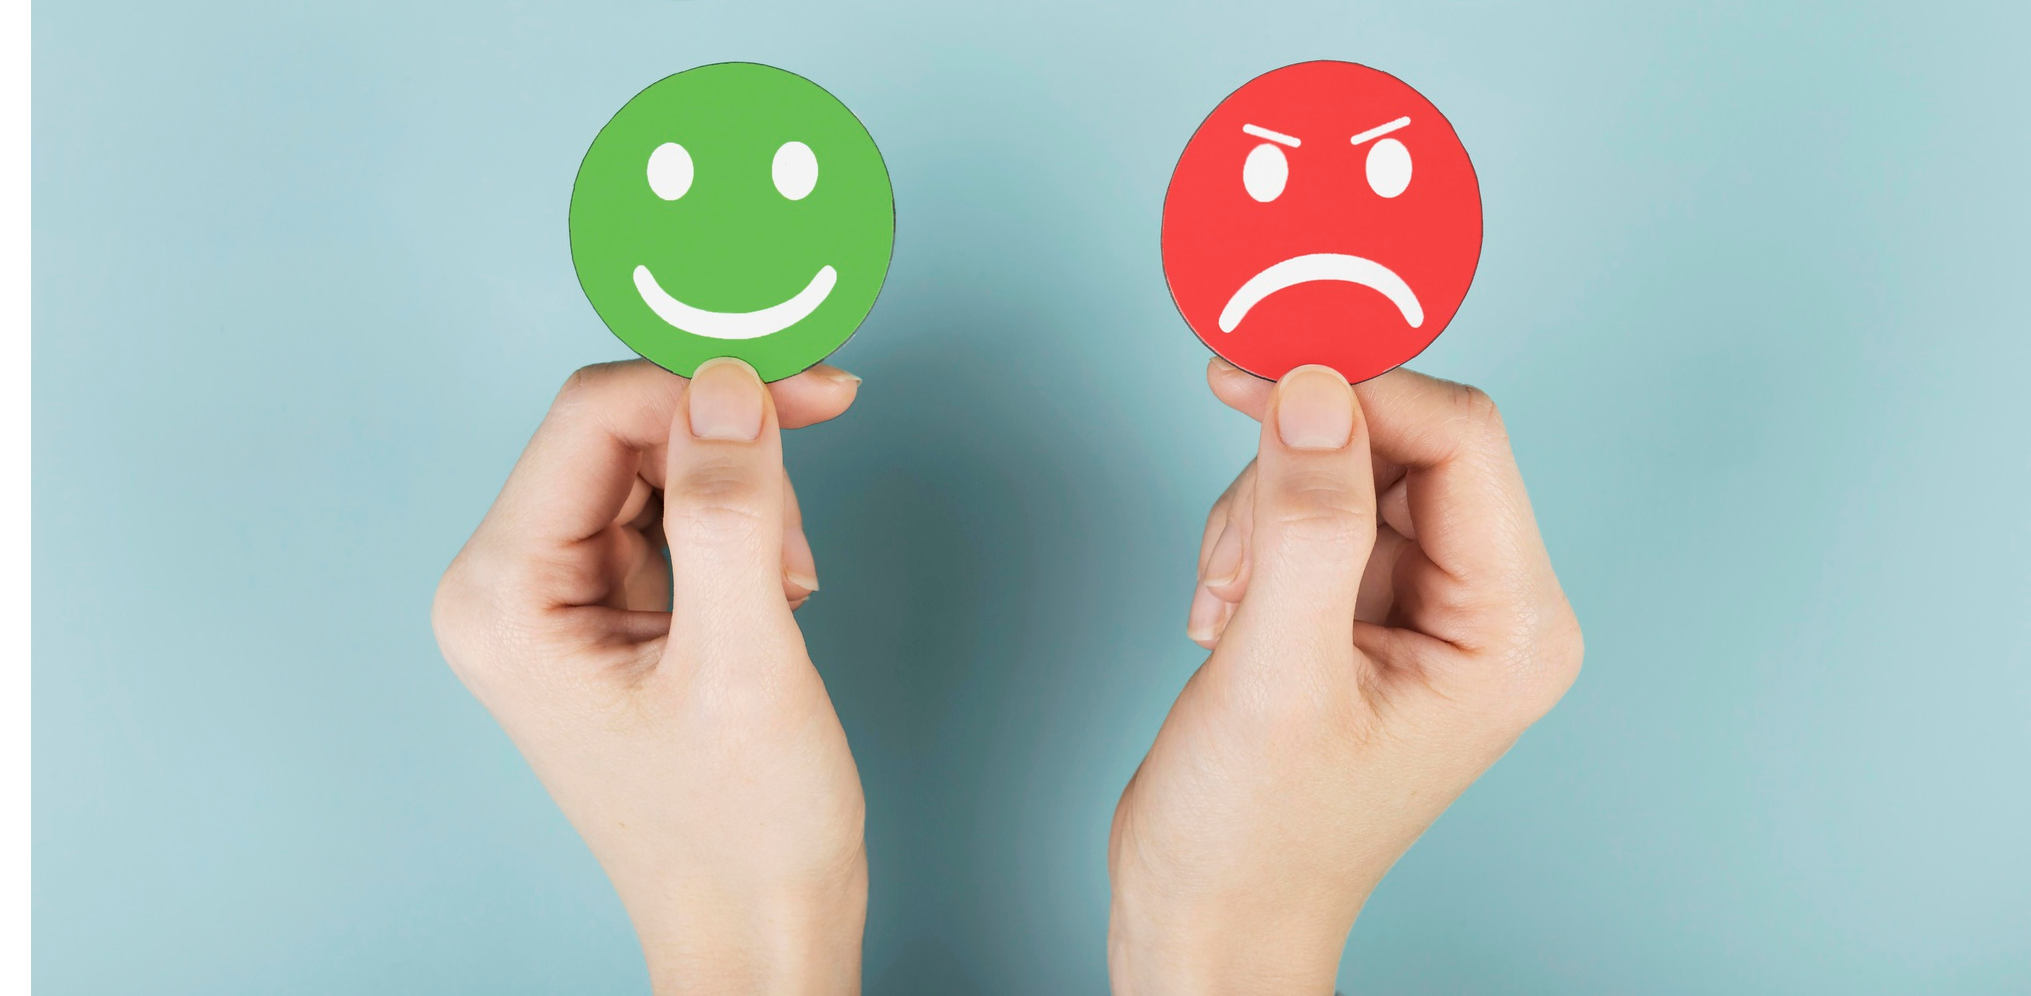

Image by <a href="https://www.freepik.com/free-photo/top-view-arrangement-emotions_12558017.htm#page=2&query=happy%20and%20sad&position=13&from_view=search&track=ais">Freepik</a>

## Introduction ##

In this project, the goal is to examine two months of the reviews on the movie *Elemental* to see the overall sentiment the audience has for the movie. A Machine learning model will also be used to predict if the review is positive or negative based on the text data provided in the dataset.

The data for this project consists movie ratings, dates, comment, and helpful review vote from each user's online review. There are 264 observations, and each observation in the data represents a different user from a movie review website. The target variable will be a Boolean value that indicates if the sentiment is positive or negative.

Data was collected, using the Listly extension to scrape four sets of review data, from IMDB and Metacritic. After the data was collected, Micrsoft Excel was used, specifically Power Query, to preprocess the data. All four datasets were then combined into one dataset covering two months of data since the movie's release.

As mentioned, the data for this project was preprocessed after data collection. For example, the **new rating** column values, which ranged from 1 to 5, was extracted from the **old rating** column which ranged from 1 to 10. This **new rating** column was added to give our ratings a range similar to popular movie critic websites. After all the columns were renamed to clearly define their content, the data was pre-cleaned to make the data comprehenisive, consistent, and accurate across each column.

## Read in the Data ##

Import the libraries we need.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Lets retireve the dataset and get a prevew of the data.

In [2]:
# Read in dataset through pandas dataframe and sssign dataset to variable called "df"
df = pd.read_excel('elemental_movie_reviews.xlsx', sheet_name= 'UpdatedMergedReviews2.0')

# Look at the first 5 rows
df.head()

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful
0,1,3.0,6.0,benjaminskylerhill,2023-06-16,Elemental has several obvious glaring problems...,35
1,2,2.0,3.0,truthisuncouth,2023-06-17,This is a worn out story of recycled material ...,64
2,3,2.0,3.0,jamesbond-28264,2023-06-16,I didn't expect anything from this and i wasn'...,45
3,4,3.0,6.0,karim530,2023-06-16,I don't know where to start with this movie. I...,52
4,5,1.0,1.0,kidkamandi,2023-06-18,No comment,53


Now, to explore the data to understand the variables.

In [3]:
# Basic statistics of the dataset
df.describe(include = 'all', datetime_is_numeric = True)

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful
count,264.000000,263.000000,263.000000,263,263,264,264.000000
unique,NaN,NaN,NaN,263,NaN,248,NaN
top,NaN,NaN,NaN,benjaminskylerhill,NaN,No comment,NaN
freq,NaN,NaN,NaN,1,NaN,17,NaN
mean,132.500000,3.585551,6.726236,NaN,2023-06-27 14:57:56.806083584,NaN,4.795455
min,1.000000,0.000000,0.000000,NaN,2023-06-08 00:00:00,NaN,0.000000
25%,66.750000,3.000000,6.000000,NaN,2023-06-19 00:00:00,NaN,0.000000
50%,132.500000,4.000000,8.000000,NaN,2023-06-26 00:00:00,NaN,1.500000
75%,198.250000,5.000000,9.000000,NaN,2023-07-06 00:00:00,NaN,4.250000
max,264.000000,5.000000,10.000000,NaN,2023-07-21 00:00:00,NaN,64.000000


In [4]:
# Check the data for missing values
df.isna().sum()

UserID           0
NewRating        1
OldRating        1
User             1
ReviewDate       1
Review           0
ReviewHelpful    0
dtype: int64

Since we having missing data, it would be informative to see which rows have missing data to decide how to handle it.

In [5]:
# Locate the row(s) with missing values
missing_data = df.loc[df['NewRating'].isna()]

# show row(s) with missing values
missing_data

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful
176,177,NaN,NaN,NaN,NaT,No comment,0


One row seems to hold all the missing values detected. Since it is missing important values for our analyses (i.e., no review, user, date, or rating), this row can be safely removed.

In [6]:
# Shape of data before dropping row(s)
df.shape

(264, 7)

In [7]:
# Drop the row with missing values
df = df.dropna(axis = 0)
df

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful
0,1,3.0,6.0,benjaminskylerhill,2023-06-16,Elemental has several obvious glaring problems...,35
1,2,2.0,3.0,truthisuncouth,2023-06-17,This is a worn out story of recycled material ...,64
2,3,2.0,3.0,jamesbond-28264,2023-06-16,I didn't expect anything from this and i wasn'...,45
3,4,3.0,6.0,karim530,2023-06-16,I don't know where to start with this movie. I...,52
4,5,1.0,1.0,kidkamandi,2023-06-18,No comment,53
...,...,...,...,...,...,...,...
259,260,0.0,0.0,busiek,2023-06-28,"Streaming quality film... generic, boring and ...",2
260,261,2.0,3.0,Melo51,2023-06-27,How is It that this is one of the few Disney/p...,3
261,262,3.0,6.0,bertobellamy,2023-06-27,Better than 'Lightyear' but still miles away f...,0
262,263,5.0,10.0,Denyson,2023-06-26,The movie was very good as everyone at pixar I...,1


In [8]:
# Confirm row in question with missing data was removed
df.shape

(263, 7)

In [9]:
# Validate the correct row of miising values was removed
df.loc[df['NewRating'].isna()]

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful


With the missing data handled, lets check for duplicate values since we don't want the same review more than once.

In [10]:
# Check dataset for duplicates
df.duplicated().sum()

0

Now that the dataset seems ready, lets explore the data.

## Exploratory Data Analysis ##

We shall now take a look at the "NewRating" variable, as this is the coverted rating variable of "OldRating", to see if the majority of ratings is positive or negative.

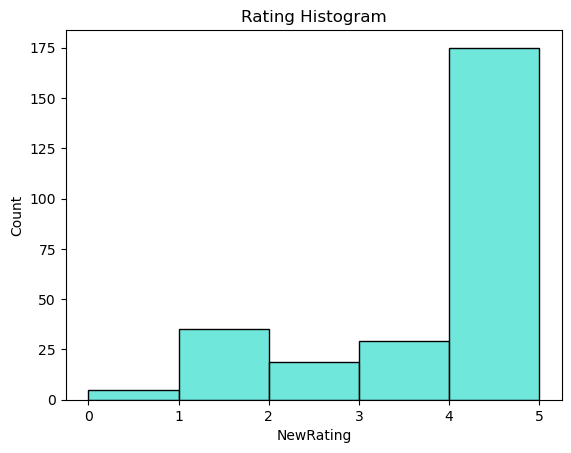

In [11]:
# Create histogram of new ratings
fig = sns.histplot(data = df, x = 'NewRating', 
                   binwidth = 1.0,
                  color = 'turquoise')

# Set title for histogram
fig.set_title('Rating Histogram')

# Display chart
plt.show()

In [12]:
# Count the occurrence of each new rating
df['NewRating'].value_counts()

4.0    92
5.0    83
1.0    35
3.0    29
2.0    19
0.0     5
Name: NewRating, dtype: int64

From the preceding histogram and value counts, we can see most audience member ratings are positive. This finding leads me to think that most of the reviews will be positive as well. 

Before we analyze the reviews, lets continue exploring the data for further understanding, specificaly with finding the reviews helpful.

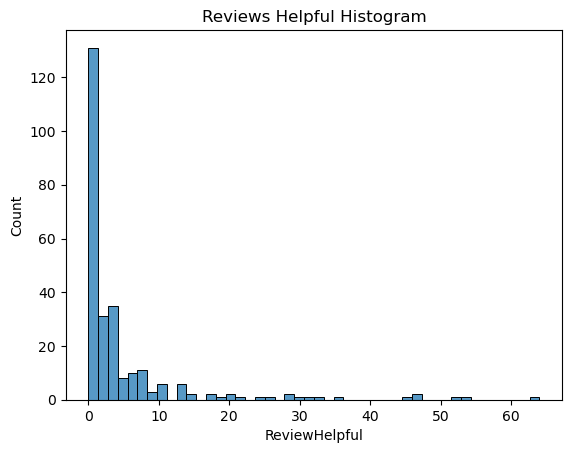

In [13]:
# Show the distribution of review helpful
fig = sns.histplot(data = df, x = 'ReviewHelpful')

# Set title to histogram
fig.set_title('Reviews Helpful Histogram')

# Display chart
plt.show()

Most reviews were not found to be very helpful it seems. However, there are some higher values that need looking into. So, we shall explore for outliers.

<AxesSubplot:xlabel='ReviewHelpful'>

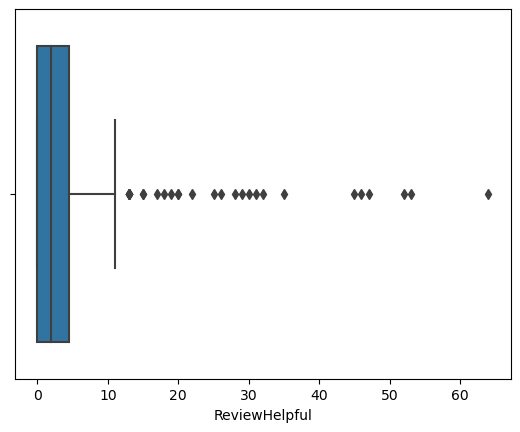

In [14]:
# Check the review helpful for outliers

sns.boxplot(data = df, x = 'ReviewHelpful')

In [15]:
# Check the rows with Review Helpful over 11
outlier_df = df.loc[df['ReviewHelpful'] > 11]

outlier_df.head()

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful
0,1,3.0,6.0,benjaminskylerhill,2023-06-16,Elemental has several obvious glaring problems...,35
1,2,2.0,3.0,truthisuncouth,2023-06-17,This is a worn out story of recycled material ...,64
2,3,2.0,3.0,jamesbond-28264,2023-06-16,I didn't expect anything from this and i wasn'...,45
3,4,3.0,6.0,karim530,2023-06-16,I don't know where to start with this movie. I...,52
4,5,1.0,1.0,kidkamandi,2023-06-18,No comment,53


It seems most audience members found the reviews helpful when the rating was 3 or lower. To confirm this observation, we shall group the outlier data to get a better picture.

In [16]:
# Group the data by rating and get the average ReviewHelpful
grouped_oultlier = outlier_df.groupby(by= 'NewRating').mean()['ReviewHelpful']

# Assign grouped outlier to a dataframe
pd.DataFrame(data = grouped_oultlier)

,ReviewHelpful
NewRating,
1.0,20.666667
2.0,54.500000
3.0,30.400000
4.0,23.600000
5.0,35.000000


It seems on average, reviews were found most helpful when the rating was 2. A rating of 5 and 3 were also found helpful. This finding leads me to think, those audience members that gave a rating of 2 may have given more detailed reviews or were most known on the review site.

After researching the users that gave the rating of 2 on IMDB, it seems those users are shown to be high ranked contributors to the site with being ranked bronze, silver, or gold. This status might explain the number for reviews found helpful.

Now, we shall see how these reviews found helpful looked over time.

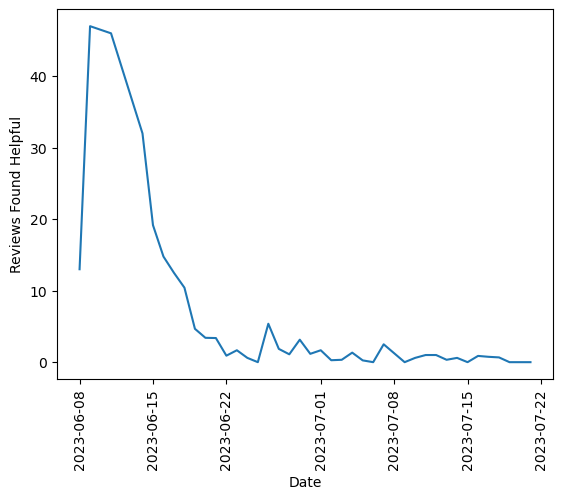

In [17]:
# Show the trend of Review Helpful

sns.lineplot(x = 'ReviewDate', y = 'ReviewHelpful', data = df, ci = None)

# Set x-axis label
plt.xlabel('Date')

# Set y-axis label
plt.ylabel('Reviews Found Helpful')

# Rotate x-axis ticks for better readability
plt.xticks(rotation = 90)

# Display chart
plt.show()

Hm... the above chart does not seem right. From the initial look at the dataset, 64 to 65 audience members found a review helpful around June 17, not June 8 to 9.

In [18]:
df.loc[df['ReviewHelpful'] >= 64]

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful
1,2,2.0,3.0,truthisuncouth,2023-06-17,This is a worn out story of recycled material ...,64


This misalignment may have occurred because there are missing dates between the reviews. The dates will need to be introduced to the dataset to get a more accurate trend.

In [19]:
# Filling in missing dates to get a more aligned value to date chart
df2 = df.set_index('ReviewDate').resample('D').first().reset_index()

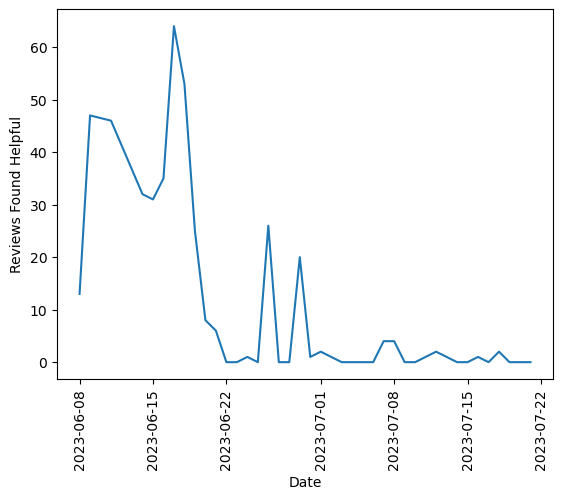

In [20]:
# Show the trend of Review Helpful

sns.lineplot(x = 'ReviewDate', y = 'ReviewHelpful', data = df2, ci = None)

# Set x-axis label
plt.xlabel('Date')

# Set y-axis label
plt.ylabel('Reviews Found Helpful')

# Rotate x-axis ticks for better readability
plt.xticks(rotation = 90)

# Display chart
plt.show()

This preceding chart looks more accurate. It seems reviews made at or around the release date for the movie (i.e, released June 16) were found the most helpful by audience members, which does make sense for the first few weeks of the movie showing.

Now, we shall explore what the most frequently used words are in the reviews.

In [21]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

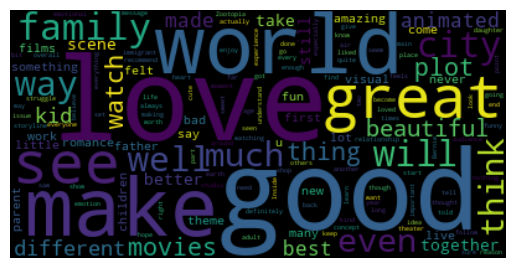

In [22]:
# Create stopwords list
stopwords = set(STOPWORDS)

# Update stopwords with other common words in the dataset
stopwords.update(['Elemental', 'element', 'elements', 'film', 'movie', 'Pixar', 'character', 'story', 
                  'Ember', 'Wade', 'Disney', 'characters', 'fire', 'water', 'really', 'animation', 'time',
                 'people', 'feel', 'people', 'one'])

# Separate the words
words_text = ' '.join(word for word in df['Review'])

# Create the worldcloud
wordcloud = WordCloud(stopwords = stopwords).generate(words_text)

# Display the plot
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('wordcloud1.png')
plt.show()

Popular words that can be observed above are ***world***, ***love***, ***good***, and ***family***. These words are mostly leaning toward a positive sentiment, suggesting most reviews seem positive.

The next part of the analysis is to classify reviews as **positve** and **negative**, so that we can use these categories as training data for our model.

For this analysis, positive reviews will be labeled +1 while negative reviews will be labeld -1. All the ratings falling above 3 will be classified as postive reviews and all ratings falling below 3 will be classified as negative reviews.

Ratings that equal 3 will be dropped as they ar e seen as neutral and our model will only classify positve and negative reviews/

In [23]:
# Assign reviews with a rating > 3 positive sentiment
# rating < 3 negative sentiment
# remove score equals 3

# Assogn to a new dataframe called sentiment
sentiment_df = df.copy()
sentiment_df = sentiment_df.loc[df['NewRating'] != 3]
sentiment_df['sentiment'] = sentiment_df['NewRating'].apply(lambda rating: +1 if rating > 3 else -1)

In [24]:
# Preview the df subset sentiment 
sentiment_df.head()

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful,sentiment
1,2,2.0,3.0,truthisuncouth,2023-06-17,This is a worn out story of recycled material ...,64,-1
2,3,2.0,3.0,jamesbond-28264,2023-06-16,I didn't expect anything from this and i wasn'...,45,-1
4,5,1.0,1.0,kidkamandi,2023-06-18,No comment,53,-1
5,6,1.0,1.0,pvandaele,2023-06-19,No comment,25,-1
7,8,4.0,7.0,ajacayen-08856,2023-06-15,"Alongside the release of The Flash, I have nev...",31,1


In [25]:
# Split sentiment df into positive and negative

positive = sentiment_df[sentiment_df['sentiment'] == 1]

negative = sentiment_df[sentiment_df['sentiment'] == -1]

Now that we split the reviews into positive and negative, we will make wordclouds of each to see the most prevalent words.

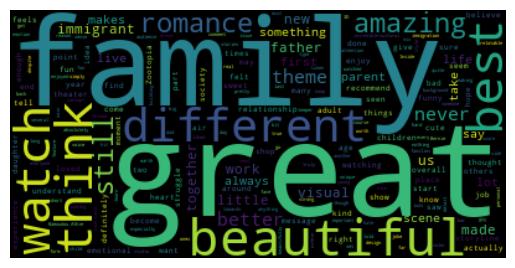

In [26]:
# Positive review words
stopwords = set(STOPWORDS)
stopwords.update(['Elemental', 'element', 'elements', 'film', 'movie', 'Pixar', 'character', 'story', 'good', 
                  'Ember', 'Wade', 'one', 'characters', 'fire', 'water', 'really', 'Disney', 'animation','movies',
                 'love', 'time', 'feel', 'kid', 'kids', 'plot', 'people', 'make', 'world', 'way', 'much', 'well',
                 'thing', 'city', 'will', 'see', 'even', 'films', 'animated'])
pos = ' '.join(word for word in positive['Review'])
wordcloud2 = WordCloud(stopwords = stopwords).generate(pos)

plt.imshow(wordcloud2, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('wordcloud2.png')
plt.show()

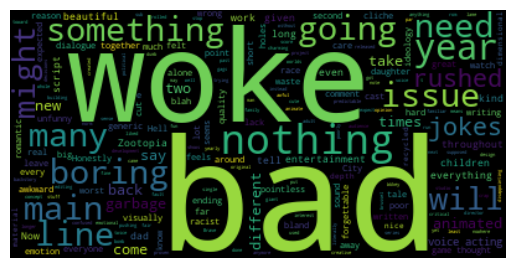

In [27]:
# Negative review words
stopwords = set(STOPWORDS)
stopwords.update(['Elemental', 'element', 'elements', 'film', 'movie', 'Pixar', 'character', 'story', 'good',
                  'Ember', 'Wade', 'one', 'characters', 'fire', 'water', 'really', 'Disney', 'animation', 'movies',
                 'love', 'thing', 'think', 'time', 'feel', 'kid', 'kids', 'plot', 'people', 'make', 'world', 'another',
                 'overall', 'scene', 'scenes', 'end', 'made', 'first', 'go', 'way', 'making', 'idea', 'see', 'seen', 
                  'things', 'films'])
neg = ' '.join(word for word in negative['Review'])
wordcloud3 = WordCloud(stopwords = stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('wordcloud2.png')
plt.show()

As seen from the above wordclouds, the positive sentiment had a wordcloud full of positive words such as ***great***, ***best***, ***beautiful***, ***think***, and ***family***.

The negative sentiment had a worldcloud full of negative words such as ***bad***, ***woke***, ***nothing***, ***rushed***, and ***boring***

The words such as ***good***, ***animated***, and ***love*** - along with many other words - appeared in positive and negative reviews, despite appearing intially as positive. These probably appeared in negative reviews to apply a negative context (e.g., *not good*). So, I removed certain words from the world clouds to draw out the frequency of distinct words.  

Now, lets look at the distribution of the reviews based on sentiment.

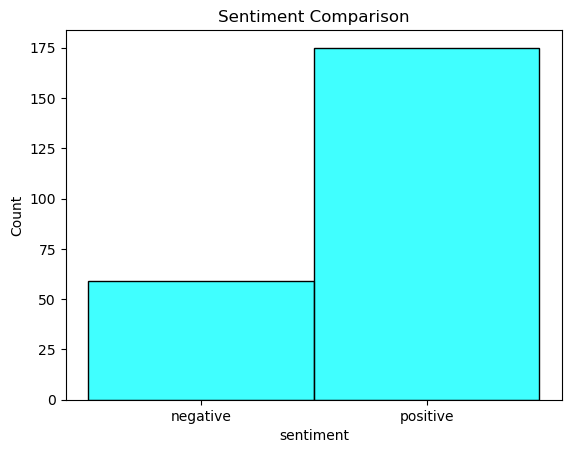

In [29]:
sentiment_df2 = sentiment_df.copy()
sentiment_df2['sentiment'] = sentiment_df2['sentiment'].replace(-1, 'negative')
sentiment_df2['sentiment'] = sentiment_df2['sentiment'].replace(1, 'positive')

fig= sns.histplot(data = sentiment_df2, x = 'sentiment', color = 'cyan')

fig.set_title('Sentiment Comparison')

plt.show()

## Building the Model ##

Let us take a look at the data again.

In [30]:
# Display preview of data
sentiment_df.head()

,UserID,NewRating,OldRating,User,ReviewDate,Review,ReviewHelpful,sentiment
1,2,2.0,3.0,truthisuncouth,2023-06-17,This is a worn out story of recycled material ...,64,-1
2,3,2.0,3.0,jamesbond-28264,2023-06-16,I didn't expect anything from this and i wasn'...,45,-1
4,5,1.0,1.0,kidkamandi,2023-06-18,No comment,53,-1
5,6,1.0,1.0,pvandaele,2023-06-19,No comment,25,-1
7,8,4.0,7.0,ajacayen-08856,2023-06-15,"Alongside the release of The Flash, I have nev...",31,1


To construct our model, there a some steps we need to complete.

Let us see how our dataset is balanced based on the sentiment categories,

### Class Balance ###

In [31]:
# Extract the ratio of positive to negative sentiment
sentiment_df['sentiment'].value_counts(normalize= True)*100

 1    74.786325
-1    25.213675
Name: sentiment, dtype: float64

Since we want make a classifier using logistic regression and our data set is fairly small as well as being approximately an 80/20 split, we should address this later on when we split our data.

### Data Cleaning ###

We will be using the **Review** data make predictions. So, we shall remove punctuations from the reviews and clean out extra charaters, symbols, and icons from the text.

In [32]:
# Imports
from cleantext import clean
import string

In [33]:
# Test code for text cleaning
test_str = "I'm here. Is this the fil/m? How is It that this is one of the few Disney/p 🤔"

# Remove puntuations
test_str = test_str.translate(str.maketrans('', '', string.punctuation))

# Remove emojis
test_str = clean(test_str, no_emoji= True)

In [34]:
# View cleaned text
test_str

'im here is this the film how is it that this is one of the few disneyp'

In [35]:
# Join the words in the text to remove remainder spaces
test_str = ''.join(w for w in test_str)

In [36]:
test_str

'im here is this the film how is it that this is one of the few disneyp'

In [37]:
# Create a function to clean the review text
def punctuation_remover(text):
    '''
    This function removes puntuation, symbols and emojis from string.
    Translate removes puntuations while clean removes emojis.
    The cleaned text is then assigned to the final_text variable, where the strings are then joined
    This function returns final_text
    '''
    new_text = text
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = clean(text, no_emoji= True)
    final_text = new_text
    
    final_text = ''.join(w for w in text if w not in '/')
    
    return final_text

In [38]:
# Apply the punctuation_remover to the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(punctuation_remover)

### Split the Dataframe ###

Our dataframe will now only have two columns, **Review** (our text data) and **sentiment** (our target variable). We will also drop the rows with 'No comment' since they offer no insight into the reason for the sentiment.

In [39]:
# Create a dataframe with the necessary variables
new_df = sentiment_df[['Review', 'sentiment']]

# Remove reviews of 'No comment'
new_df = new_df.loc[new_df['Review'] != 'No comment']

# Preview dataset
new_df.head()

,Review,sentiment
1,This is a worn out story of recycled material ...,-1
2,I didn't expect anything from this and i wasn'...,-1
7,"Alongside the release of The Flash, I have nev...",1
8,This is the very first Pixar movie I don't lik...,-1
9,"Elemental is bad, it's as simple as that. Ther...",-1


We will now split the dataframe into train and test sets, where 75% of the data will be used for training and 25% for testing.

In [40]:
# Import training and tsting split
from sklearn.model_selection import train_test_split

In [41]:
# Define the y (target) variable
y = new_df['sentiment']

# Define the X (predictor) variable
X = new_df['Review']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,
                                                   stratify= y, random_state= 42)

### Create a Bag of Words ###

For this part we will use the count vectorizer from the Scikit-learn library. This count vetorizer will transform our data into a bag of words. The bag of words will hold a sparse matrix of integers, which are the number of occurrences each word will be counted.

This transformation will help our logistic regression understand the text.

In [42]:
# Import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Cerate vectorizer
vectorizer = CountVectorizer(token_pattern = r'\b\w+\b')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Logistic Regression ##

In [43]:
# Import
from sklearn.linear_model import LogisticRegression

# Assign logistic regression
lr = LogisticRegression()

### Split the target variable from the predictor variable ###

In [44]:
# View the shapes of the predictor train and test data to ensure the columns are balanced
print('X training data shape:',X_train.shape)
print('X test data shape:', X_test.shape)

X training data shape: (165, 3355)
X test data shape: (55, 3355)


### Fit Model to Data ###

In [45]:
# Fit the data to our logistic regression
lr.fit(X_train, y_train)

LogisticRegression()

### Make Predictions ###

In [46]:
# Test our model
predictions = lr.predict(X_test)

In [47]:
# Display evaluation metrics
from sklearn import metrics

### Metrics to Evaluate Performance ###

For the evaluation of the data produced by the model, we will use several metrics to evaluate the model's perfomance on the actual observed values relative to the model's prediction.

In [48]:
# Display evaluation metrics
print('Accuracy score:', '%.3f' % metrics.accuracy_score(predictions, y_test))
print('Precision score:', '%.3f' % metrics.precision_score(predictions, y_test))
print('Recall score:', '%.3f' % metrics.recall_score(predictions, y_test))
print('F1 score:', '%.3f' % metrics.f1_score(predictions, y_test))

Accuracy score: 0.873
Precision score: 0.951
Recall score: 0.886
F1 score: 0.918


Based on the metrics above, the model got an accuracy of 0.873, or found to be 87.3% accurate.

Given that we are trying to solve a classification problem, accuracy is good to know, especially with the given result. However, this metric has its limitations in our case. Since or data is kept imbalanced, to be representative of the population in our dataset, the model could have diffculty fales positives and negatives. This caveat prompts more focus on the precision and recall scores.

Precision and recall will be useful at evaluating the correct predictive capability of our model because both balance false positives and fale negatives.

The model displays a precision score of 0.951, suggesting the model is good at predicting true positives - meaning the review was positive - while balancing false positives. Alternatively, the recall score is 0.886, showing a lower performance in predicting true negative - where the review was negatives - while balancing for false negatives. These both give a better understanding of model performance.

The F1 score for our model is 0.918. ths score balances the precision and recall performace to assess how well the model delivers predictions. Given the results, the F1 score suggests a good predictive power in this model. 

Now we shall interpret our confusion matrix, which will produce a visual display of the true and fale positives and negative. 

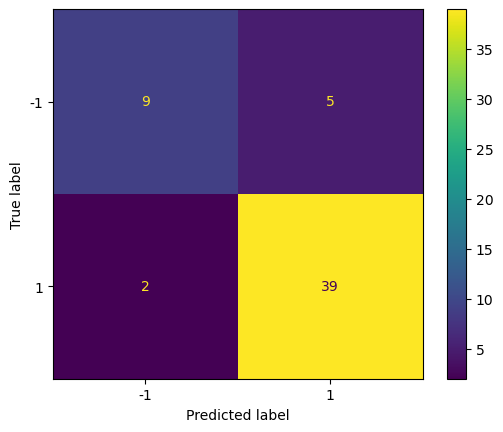

In [49]:
# Display our true negative, false positive, false negative, and true positive confusion matrix

# Construct confusion matrix for the predicted and test values
cm = metrics.confusion_matrix(y_test, predictions, labels = lr.classes_)

# Create display for confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = lr.classes_)

disp.plot()
 
# Display the plot
plt.show()

Upon observation of the confusion matrix, the top left (true negatives) and bottom right (true positives) squares represent the correct predictions.

The amount of true positives greatly stands out from false positives (above the bottom right square), suggesting that this ratio is why the precision score is high (0.951).

True negatives and false negatives (under the top left square) have a noticeable difference between their amounts but not as great a difference compare to precision, which may explain its lower score.

## Considerations and Conclusion ##

The model created for our sentiment analysis provides some value in predicting a positve or negative sentiment given the context of the review. 

Particularly, the model performed better at predicting true positives than it did at predicting true negatives. This finding suggests the model more accurately identified those reviews with more positive words than it did for those reviews with more negative words.